DAY 1
Paso 1: Definición del problema
Antes de comenzar a analizar el conjunto de datos, debemos definir el problema o desafío que estamos intentando resolver con esta información

En este caso, trabajaremos con un conjunto de datos del airbn, y nuestro objetivo será poder entrenar un modelo de Machine Learning para responder a la pregunta:

"¿a que se debe el precio de la estadia de un inmueble?".

Paso 2: Recopilación de datos

Importamos los datos y creamos el DataFrame

In [38]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/raw/internal-link.csv")
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h3>Análisis Descriptivo</h3>

In [39]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [40]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


<h3> Observaciones:</h3>

Existen un total de 48895 filas (en este caso, registros de alojamientos) y 16 columnas, entre las cuales encontramos el target o clase a predecir, Price.

La variable last_review tiene al menos 1000 valores nulos lo que representa mas de un 20% de los registros.

La variable reviews_per_month tambien cuenta con al menos 1000 valores nulos.

Los datos cuentan con 10 características numéricas y 6 características categóricas.

se observan valores minimos en el precio de 0$ y maximos de 10.000$ por noche

se encuentran valores minimos de 0 para disponibilidad al año "availability_365"

la variable minimo de noches "minimum_nights" posee valores maximos de 1250 dias 

# 4 Limpieza de datos

In [42]:
#datos duplicados
df.drop("id", axis=1).duplicated().sum()


np.int64(0)

In [43]:
df[(df["price"] > 1000)].shape

(239, 16)

<h3> Observaciones</h3>
En este caso, no encontramos ningún valor duplicado. 

<h3>limpiezas de columnas y filas:</h3>

Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:

id, name, host_id, host_name, last_review, reviews_per_month, calculated_host_listings_count.

In [ ]:
df.drop(["id", "name", "host_id", "neighbourhood","host_name", "last_review", "reviews_per_month", "number_of_reviews", "calculated_host_listings_count"], axis=1, inplace=True)

Al observar la info de cada columna observamos ciertos valores atipicos en donde el valor maximo para el minimo de noches "minimun_nigths" puede llegar a 1250 noches, lo que equivale cerca a unos 4 años, para este estudio se pretende observar precios de estadia para vacacionar que pueden servir para locales o extranjeros y asumiendo que de un pais a otro tienes un permiso de maximo 90 dias para alojarte en el pais entonces se reduciran los datos a lugares que como maximo tengan un "minimun_nigths" de 90 

para seguir con la limpieza de datos tomaremos en cuenta los registros cuya disposicion es al menos una noche al año, cuyo precio es mayor que cero y que el precio por noche esta por debajo de 1000, se asume que alquileres con precios mayores a 1000 hace referencia a propiedades muy lujosas y que no vendria al caso para este estudio ya que representan un porcentaje pequeño (solo 239 de 48895) de los registros y no es muy usual el pago para el turista promedio 

In [45]:
df = df[(df["price"] < 1000) & (df["price"] > 0) & (df["availability_365"] > 0) & (df["minimum_nights"] <= 90)]

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,30988.0,40.728321,0.056614,40.49979,40.68826,40.72352,40.763033,40.91306
longitude,30988.0,-73.948466,0.051458,-74.24442,-73.98307,-73.95392,-73.929808,-73.71299
price,30988.0,148.025591,121.976058,10.00000,70.00000,110.00000,185.000000,999.00000
minimum_nights,30988.0,7.121660,11.055891,1.00000,2.00000,3.00000,5.000000,90.00000
availability_365,30988.0,174.912999,125.994771,1.00000,55.00000,166.00000,303.000000,365.00000


<h3> Observaciones:</h3>

Al hacer limpieza de los datos tenemosun cambio notable en la tabla de datos, ha disminuido en un gran porcentaje ya que de 48948 datos que teniamos originalmente hemos eliminados tantos hasta quedarnos con 30988

# Paso 5: Análisis de Variables

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores.

<h3>Variables univariantes categóricas</h3>
En este conjunto de datos tenemos: neighbourhood_group, room_type:

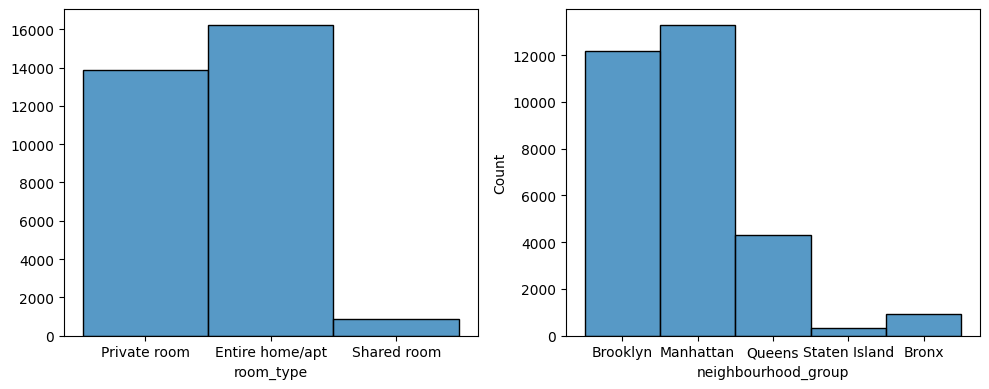

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ax=axis[0], data=df, x="room_type").set(ylabel=None)
sns.histplot(ax=axis[1], data=df, x="neighbourhood_group")

plt.tight_layout()
plt.show()

<h3>Observaciones</h3>

 Con la representación de cada variable podemos determinar que:

room_type: el tipo de habitaciones private room y Entire home/apt tienen casi la totalidad de los regitros mientras que Share room posee a lo sumo unos 1000 registros de la totalidad

neighbourhood_group:Los datos de los registros se encuentran en su mayoria en Brooklyn y Manhattan, en segundo lugar se encuentra queens y con menos registros Staten Island y bronx


<h3>Análisis de Variables Univariante Numéricas</h3>

 en este conjunto de datos tenemos: price, minimum_nights, availability_365, latitude, longitude.
 

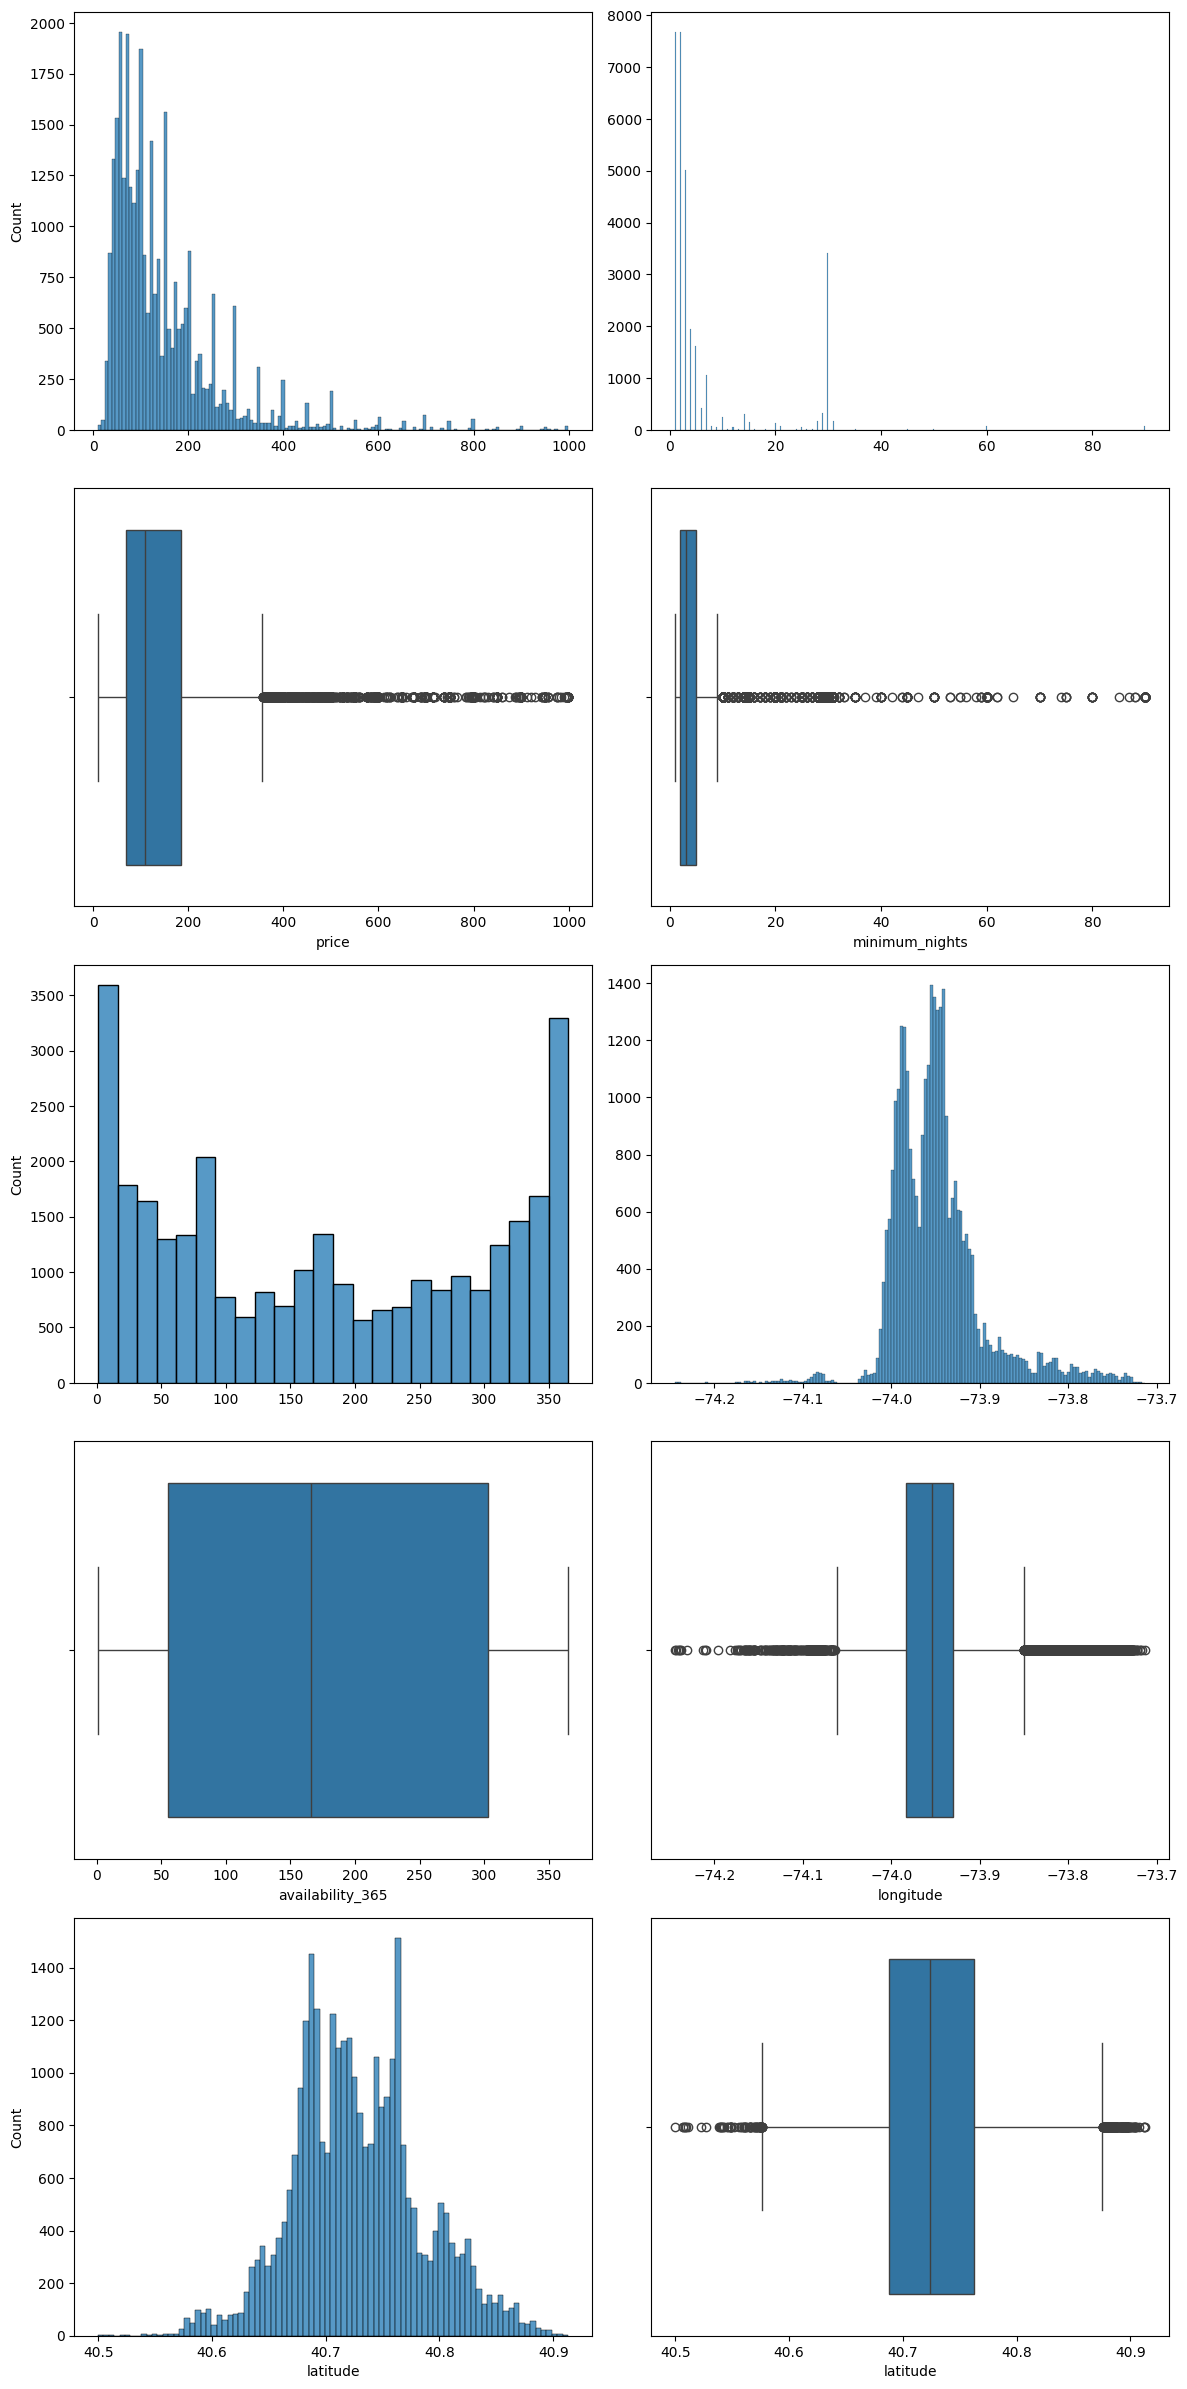

In [48]:
fig, axis = plt.subplots(5, 2, figsize=(12, 24))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None)
#axis[0, 0].set_xticks(np.arange(0, 600, 100))
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights")
sns.histplot(ax=axis[2, 0], data=df, x="availability_365").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="availability_365")
sns.histplot(ax=axis[2, 1], data=df, x="longitude").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="longitude")
sns.histplot(ax=axis[4, 0], data=df, x="latitude")
sns.boxplot(ax=axis[4, 1], data=df, x="latitude")

plt.tight_layout()
plt.show()

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,30988.0,40.728321,0.056614,40.49979,40.68826,40.72352,40.763033,40.91306
longitude,30988.0,-73.948466,0.051458,-74.24442,-73.98307,-73.95392,-73.929808,-73.71299
price,30988.0,148.025591,121.976058,10.00000,70.00000,110.00000,185.000000,999.00000
minimum_nights,30988.0,7.121660,11.055891,1.00000,2.00000,3.00000,5.000000,90.00000
availability_365,30988.0,174.912999,125.994771,1.00000,55.00000,166.00000,303.000000,365.00000


<h3>Observaciones</h3>
Price: la promedio de los precios se encuentre ubicada en 148$ aproximadamente con un rango de valores comunes entre 0$ y 400$ y con pocos registros de 400$ a 1000$ donde el 75% de los registros se encuentra por debajo de 185$

minimum_nights: para 75% de los alojamientos tenemos un valor maximo  de minimo de noches de 5 noches solo un 25% de los  registros acepta reservas para 1 o 2 noches como minimo, menos de un 25% exije un minimo de noches elevadas, se puede decir que son lugares de estadia de larga duracion.

availability_365: el 25% de los  registros tienene una disponibilidad anual de un maximo de 55 dias al año, con una media de 174 y solo un 25% de los datos esta disponible mas de 303 dias año

longitude: los datos se encuentran posicionados entre las cordenadas -74.24442 y -73.71299

latitude: los datoss se encuentran posicionados entre las cordenadas 40.49979 y 40.91306








In [50]:
#ajustando nuestros precios a una nueva variable ordenados por rango de precios
# Definir los límites de los rangos
bins = [0, 80, 200, 400, 600, 1000]

# Definir las etiquetas de categorías
labels = [1, 2, 3, 4, 5]

# Crear la variable categórica
df["price2"] = pd.cut(df["price"], bins=bins, labels=labels, include_lowest=True)

In [51]:
# conteo de registros por categorias
df['price2'].value_counts().sort_index()

price2
1    10386
2    14672
3     4752
4      777
5      401
Name: count, dtype: int64

# Análisis de Variables Multivariante

<h4>Análisis numérico-numérico</h4>

price - (availability_365, minimum_nights, longitud, latitud)

Primero analizamos el target frente a las características numéricas:

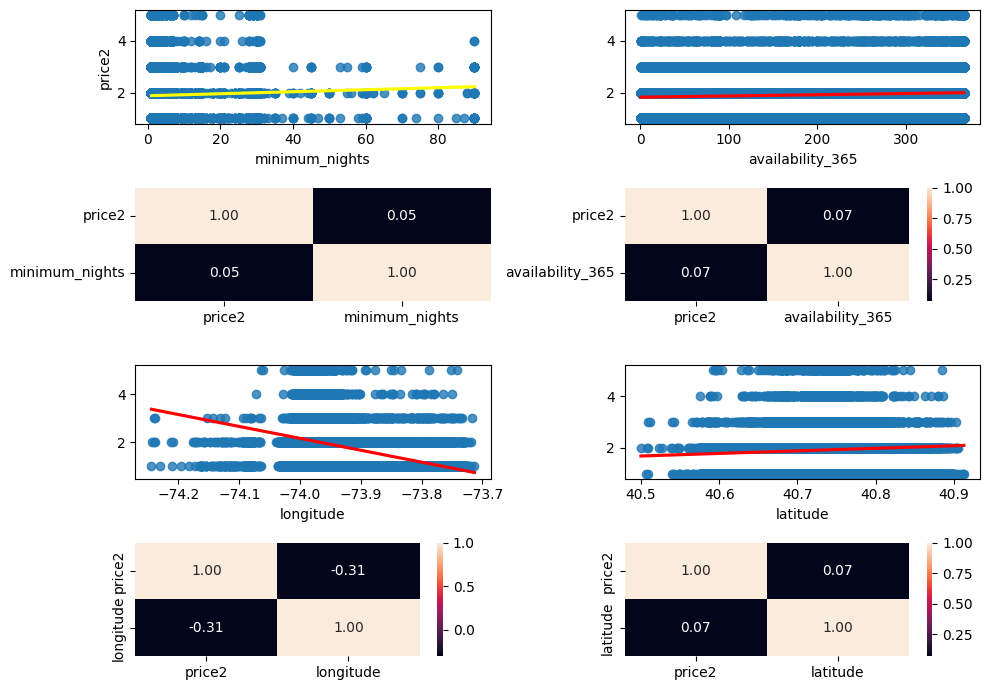

In [52]:
# Generamos las correlaciones
corr_price_minimun_nights = df[["price2", "minimum_nights"]].corr()
corr_price_availability_365 = df[["price2", "availability_365"]].corr()
corr_price_longitude = df[["price2", "longitude"]].corr()
corr_price_latitude = df[["price2", "latitude"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(4, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="minimum_nights", y="price2", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_minimun_nights, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="availability_365", y="price2", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_availability_365, annot=True, fmt=".2f")

sns.regplot(ax=axis[2, 0], data=df, x="longitude", y="price2", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[3, 0], data=corr_price_longitude, annot=True, fmt=".2f")

sns.regplot(ax=axis[2, 1], data=df, x="latitude", y="price2", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[3, 1], data=corr_price_latitude, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

<h4>Observaciones</h4>
se logra observar que la disponibilidad al año, el minimo de noches y la latidud no tienen una correlacion fuerte con el precio, la longitud aunque no es tan fuerte tiene -0.31 lo que sugiere una ligera tendencia a que mientas se encuentran en una latitud inferior el precio es mas alto.

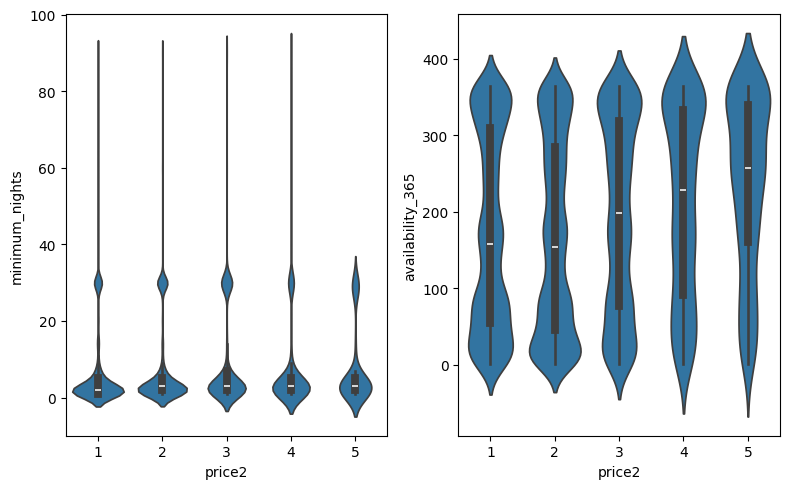

In [53]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(ax=axis[0], data=df, x='price2', y='minimum_nights')
sns.violinplot(ax=axis[1], data=df, x='price2', y='availability_365')

plt.tight_layout()  
plt.show()


<h3>Observaciones</h3>

<h4> Minimum_nights por grupo de precio</h4>

Todos los violines son muy alargados, lo que indica que hay mucha variabilidad en el número mínimo de noches.

La parte más ancha está cerca de valores bajos (0 a 5 noches) → la mayoría de los alojamientos permiten estancias cortas.

Algunos violines tienen “colas” largas hacia arriba → hay outliers con estancias mínimas muy largas (más de 60), pero son pocos.

No se observan diferencias claras entre los grupos de precio → el requisito de noches mínimas no parece variar mucho con el precio.

<h4> availability_365 por grupo de precio </h4>

Los violines son anchos en casi todo el rango, lo que indica que hay alojamientos con disponibilidad en casi todo el año y otros con muy poca.

La mediana (línea blanca en el centro) parece similar entre grupos, aunque podría haber ligera variación.

Tampoco hay una tendencia clara entre el precio y la disponibilidad → los grupos de precios tienen distribuciones parecidas.

<h4>minimum_nights - availability_365</h4>


A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

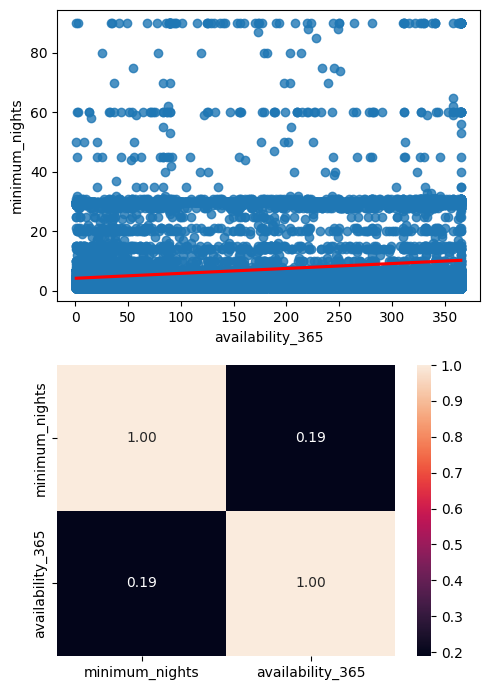

In [54]:
# Generamos la correlación entre ambas
corr_availability_365_minimum_nights = df[["minimum_nights", "availability_365"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="availability_365", y="minimum_nights", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_availability_365_minimum_nights , annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

 varible minimum_nights tiene una correlacion de 0.19 con la variable availability_365 lo que sugiere que no tienen una relacion fuerte entre ellas

<h3> Analisis categórico-categórico</h3>

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas numéricas se utilizan histogramas y combinaciones.

<h4>price - (neighbourhood_group)</h4>

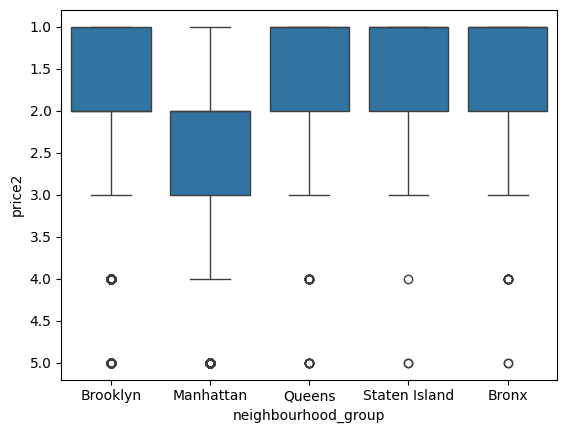

In [55]:
#varíacion del precio en general por ciudad
sns.boxplot(data=df, x='neighbourhood_group', y='price2')
plt.show()

<h3> Observaciones</h3>
Manhattan tiene un nivel de price2 significativamente más alto y una mayor variabilidad en su distribución central en comparación con Brooklyn, Queens, Staten Island y Bronx, los cuales tienen distribuciones de price2 muy similares y más bajas.

Valores Atípicos Comunes: Todos los distritos presentan valores atípicos, es decir, en las categorias de price2 cercanos a 4.0, 4.5 y 5.0). Esto sugiere que existen algunos casos en cada distrito con un price2 significativamente más alto que la mayoría, aunque estos casos son minoritarios.

<h4>price - (room_type)</h4>

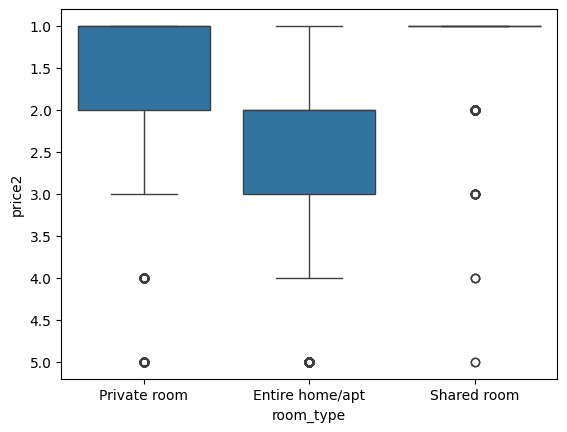

In [56]:
#varíacion del precio en general por tipo de alojamiento
sns.boxplot(data=df, x='room_type', y='price2')
plt.show()

El tipo de habitación Entire home/apt tiene la categoria del price2 central (mediana) más alto y la mayor variabilidad.

Las Habitaciones Compartidas tienen un precio central más bajo y menos variación, aunque presentan atípicos altos.

 Las Habitaciones Privadas se encuentran en un punto intermedio, con una categoria price2 central bajo pero con una distribución más amplia que la compartida.

<h3>price - (neighbourhood_group, room_type)</h3>

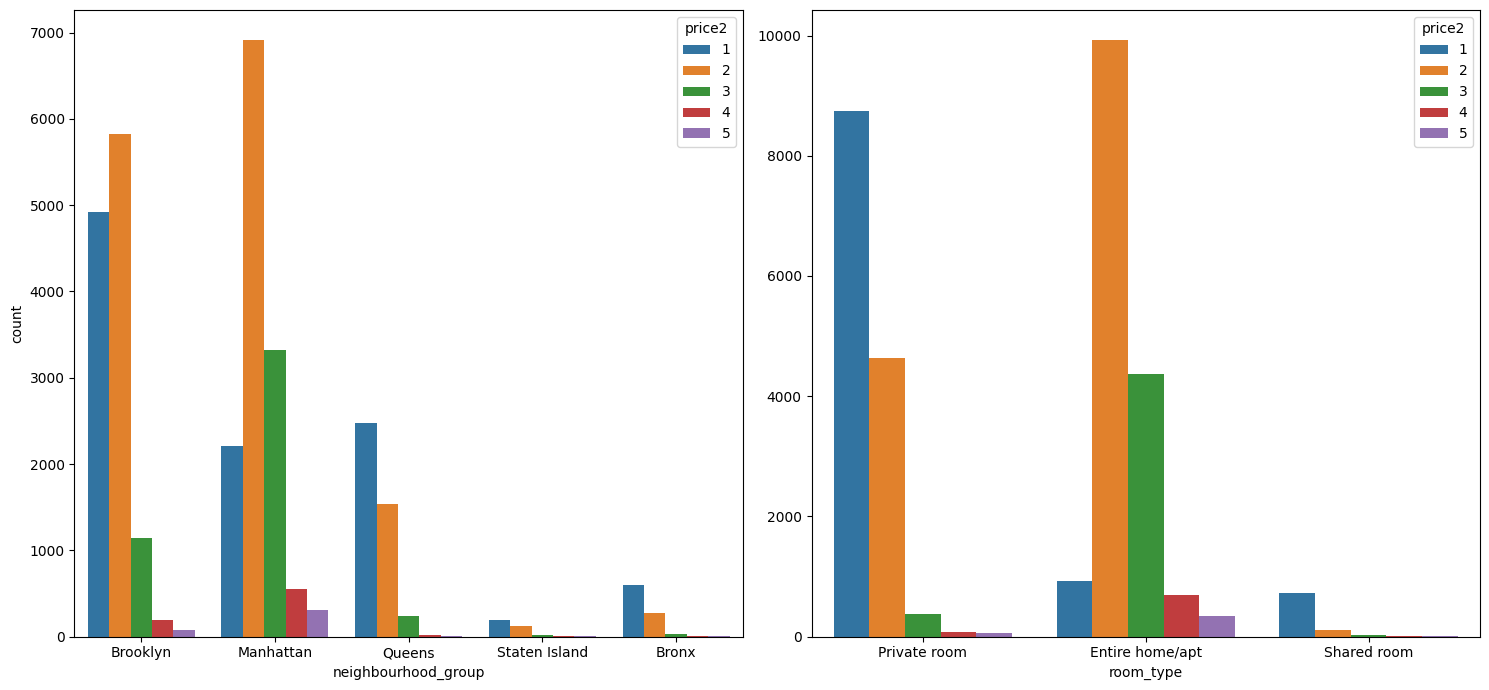

In [57]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(ax=axis[0], data=df, x="neighbourhood_group", hue="price2")
sns.countplot(ax=axis[1], data=df, x="room_type", hue="price2").set(ylabel=None)
plt.tight_layout()
plt.show()

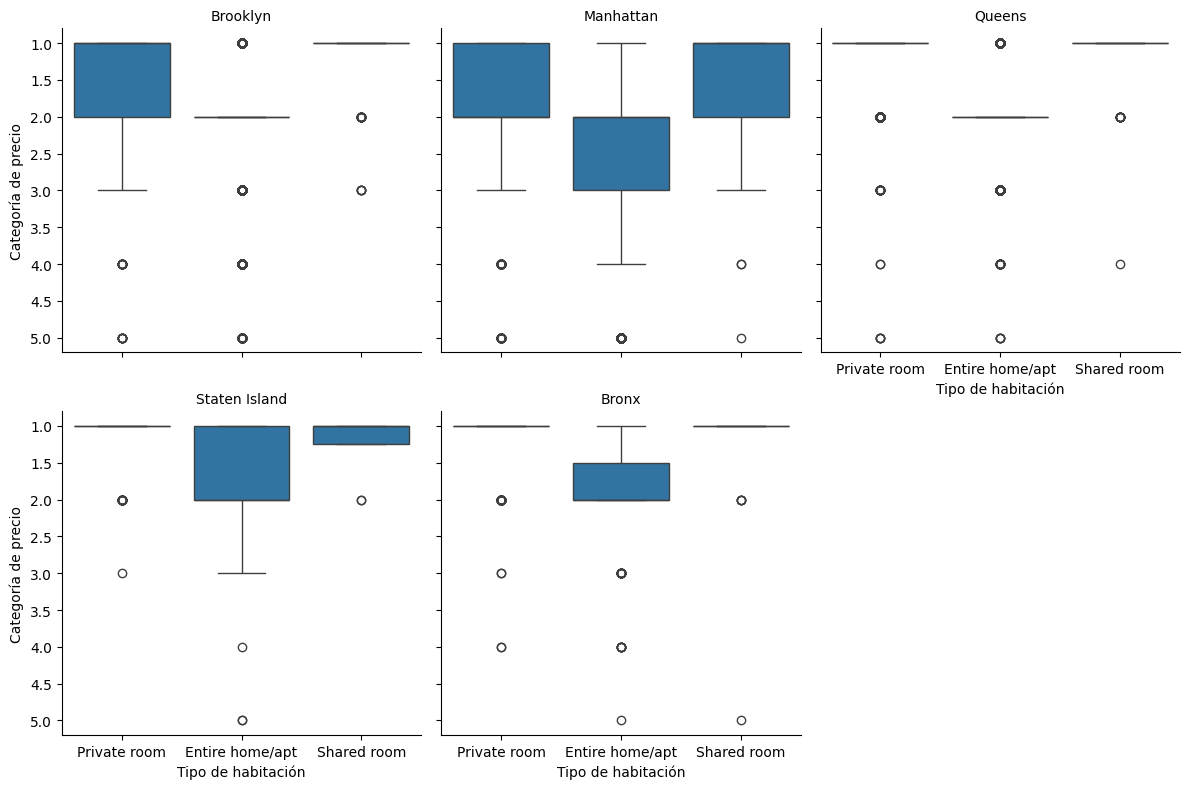

In [58]:
g = sns.FacetGrid(df, col="neighbourhood_group", col_wrap=3, height=4)
g.map_dataframe(sns.boxplot, x="room_type", y="price2")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Tipo de habitación", "Categoría de precio")
plt.tight_layout()
plt.show()

<h3>Interpretación ciudad por ciudad<h3>
<h4>Brooklyn</h4>

La mayoría de los precios están concentrados en categorías bajas (1–2).

Los “Entire home/apt” tienden a tener precios un poco más altos que los “Private room”.

Hay pocos “Shared room”, pero también en categorías bajas.

Brooklyn ofrece más alojamientos económicos, especialmente habitaciones privadas.

<h4>Manhattan</h4>

Se observa una mayor dispersión en las categorías de precio.

Hay presencia en todas las categorías (1–5), con tendencia hacia las categorías medias (2–3).

Los “Entire home/apt” presentan precios más altos en promedio que los otros tipos.

En Manhattan, los precios son más variados y pueden alcanzar las categorías altas.

<h4>Queens</h4>

Distribución muy similar a Brooklyn: concentrado en categorías bajas.

Pocos alojamientos caros.

“Entire home/apt” y “Private room” muestran precios casi iguales.

Queens también es relativamente económico.

<h4>Staten Island</h4>

La mayoría de los alojamientos están en categorías bajas (1–2).

Muy pocos alojamientos con precios altos.

Similar patrón que Queens o Brooklyn, pero con menos datos.

Staten Island tiene pocos alojamientos y es de los más baratos.

<h4>Bronx</h4>

Predominio de categorías de precio 1–2, sin presencia clara de precios altos.

“Entire home/apt” tiende a ser apenas más caro que “Private room”.

Bronx se mantiene en el rango económico.

<h3>Price - (longitud, latitud) </h3>

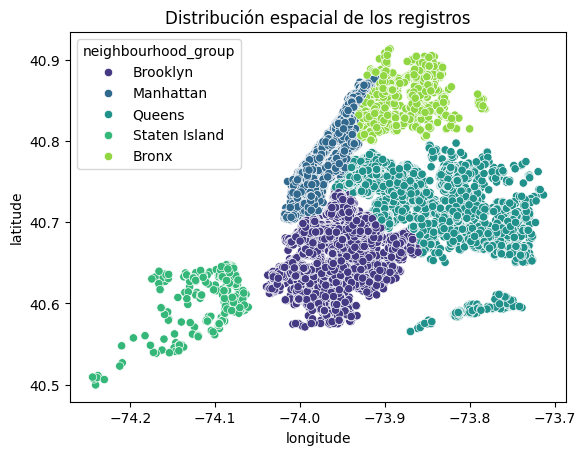

In [59]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='viridis')
plt.title("Distribución espacial de los registros")
plt.show()

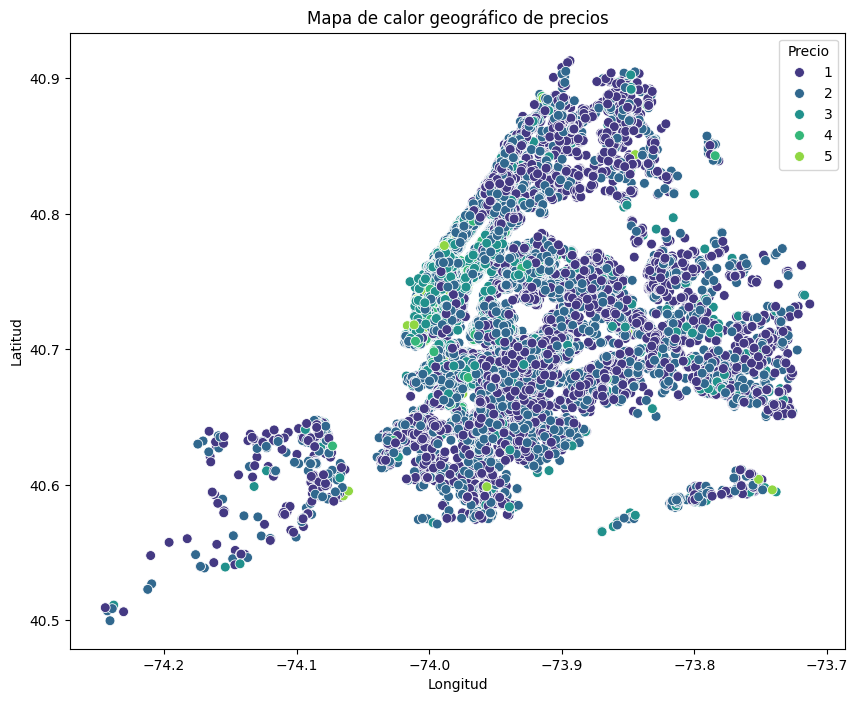

In [60]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price2', palette='viridis', s=50)
plt.title("Mapa de calor geográfico de precios")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Precio")
plt.show()

<h3> Análisis de correlaciones </h3>

In [61]:
# Creo columnas numéricas para las variables categóricas

df['number_roomtype'] = pd.factorize(df['room_type'])[0]
#casillas separadas
roomtype_transformation_rules = {row['room_type']: row['number_roomtype'] for _, row in df.iterrows()}
with open('../data/processed/roomtype-transformation-rules.json', 'w') as file:
    json.dump(roomtype_transformation_rules, file)


In [62]:
df['number_neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
#casillas separadas
neighbourhood_group_transformation_rules = {row['neighbourhood_group']: row['number_neighbourhood_group'] for _, row in df.iterrows()}
with open('../data/processed/neighbourhood_group-transformation-rules.json', 'w') as file:
    json.dump(neighbourhood_group_transformation_rules, file)


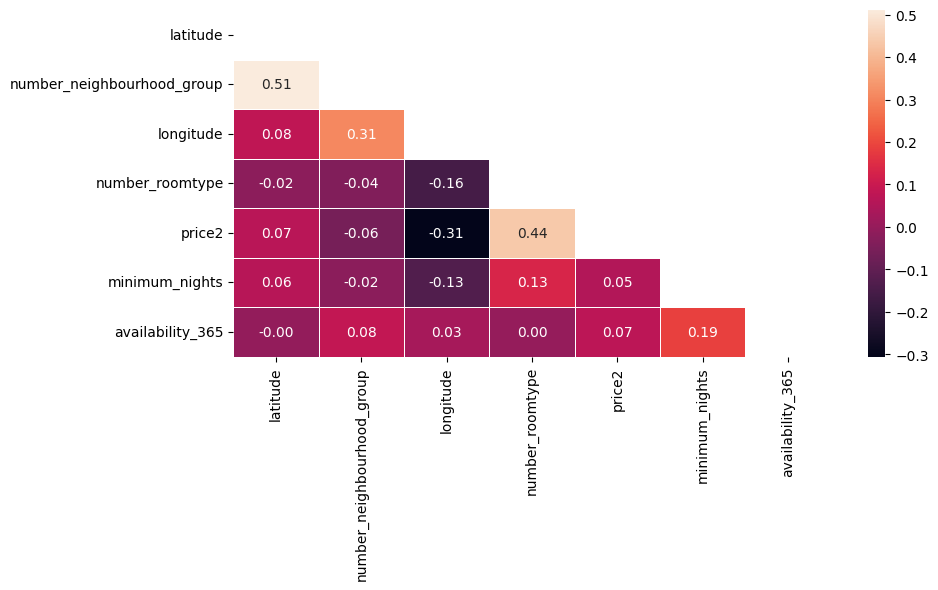

In [63]:
corr = df[["latitude", "number_neighbourhood_group", "longitude", "number_roomtype", "price2", "minimum_nights", "availability_365"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

se observa que hay una correlacion de 0.51 entre el neighbournhood y la latitud la cual no es mucha pero que es bastante coherente ya  que cada ciudad esta centrada espacialmente entre determinadas coordenadas

la  correlacion entre el precio y el tipo de habitacion es de 0.44 no es muy alta pero podria  tener sentido analizar si realmente el precio corresponde al tipo de habitacion.

<h3>Paso 7: Split</h3> 

In [64]:

df.head(5)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365,price2,number_roomtype,number_neighbourhood_group
0,Brooklyn,40.64749,-73.97237,Private room,149,1,365,2,0,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,355,3,1,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,365,2,0,1
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,194,2,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,129,2,1,1


In [65]:
# Dividimos el conjunto de datos en muestras de train y test y elimino las variables que pase a numericas anteriormente
X = df.drop(["price","price2","number_neighbourhood_group","number_roomtype"], axis=1)
y = df["price2"]


# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [66]:
X_train.to_csv("/workspaces/betaniammc-machine-learning/data/processed/.gitkeep.csv", index=False)
X_test.to_csv("/workspaces/betaniammc-machine-learning/data/processed/.gitkeep.csv", index=False)

In [67]:
X_train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365
17440,Brooklyn,40.71782,-73.95013,Private room,1,364
47253,Queens,40.75938,-73.80124,Private room,1,66
24762,Brooklyn,40.68840,-73.87253,Private room,30,202
8696,Manhattan,40.74912,-73.98007,Entire home/apt,30,189
13873,Queens,40.75869,-73.91899,Private room,1,332
...,...,...,...,...,...,...
2283,Manhattan,40.80602,-73.95362,Private room,2,72
4061,Manhattan,40.79249,-73.94592,Entire home/apt,7,6
43281,Brooklyn,40.70796,-73.94826,Private room,3,78
46817,Brooklyn,40.65926,-73.93468,Private room,2,343


In [68]:
X_train.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'availability_365'],
      dtype='object')

In [69]:
y_test.shape

(6198,)

<h3> Paso 8: Scaling & Encoding </h3>

In [70]:
# 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# 1. Creamos las instancias del encoder
label_encoder_neighbourhood_group = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_neighbourhood_group.fit(X_train['neighbourhood_group'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])
X_test_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])


# 1. Creamos las instancias del encoder
label_encoder_room_type = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_room_type.fit(X_train['room_type'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['room_type_le'] = label_encoder_room_type.transform(X_train['room_type'])  # 3.1 train
X_test_cat_le['room_type_le'] = label_encoder_room_type.transform(X_test['room_type'])  # 3.2 test

X_train_cat_le.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365,neighbourhood_group_le,room_type_le
17440,Brooklyn,40.71782,-73.95013,Private room,1,364,1,1
47253,Queens,40.75938,-73.80124,Private room,1,66,3,1
24762,Brooklyn,40.68840,-73.87253,Private room,30,202,1,1
8696,Manhattan,40.74912,-73.98007,Entire home/apt,30,189,2,0
13873,Queens,40.75869,-73.91899,Private room,1,332,3,1


<h4>Escalado minimo-maximo</h4>

In [ ]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ["neighbourhood_group_le", "latitude", "longitude", "room_type_le", "minimum_nights", "availability_365"]
min_max_features_x_train = min_max_scaler.fit_transform(X_train_cat_le[num_variables])
min_max_features_x_test = min_max_scaler.transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(
                                    min_max_features_x_train,
                                    index=X_train_cat_le.index,
                                    columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(
                                    min_max_features_x_test,
                                    index=X_test_cat_le.index,
                                    columns=num_variables)

In [ ]:
y_train

17440    2
47253    1
24762    1
8696     2
13873    1
        ..
2283     2
4061     2
43281    2
46817    1
45736    1
Name: price2, Length: 24790, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]